# Mini Project 3: COVID-19 Data Analysis and Machine Learning

#### Created by Group 7 - Kamilla, Jeanette, Juvena

## Objective

This assignment aims to develop practical skills in data analysis, visualization, and machine learning using real-world COVID-19 data. The project focuses on exploring global pandemic-related indicators to uncover trends, build predictive models, and apply both supervised and unsupervised learning techniques using Python.

Before we begin analyzing the COVID-19 dataset, we need to import a few essential Python libraries that will help us manipulate the data, build models, and visualize our findings:

- **Pandas**: This is a powerful library used to handle and manipulate data in tables (called DataFrames).
- **NumPy**: It helps with numerical operations, especially when we work with arrays or need to do math.
- **Matplotlib** and **Seaborn**: These are popular libraries for creating visual charts and graphs. We'll use them to help us understand the data better by seeing it.
- **SciPy (stats module)**: This gives us access to statistical tools like checking if data is normally distributed.

We'll also configure default styles for our plots to ensure they're clean, visually appealing, and easy to interpret.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

--------

# 1. Data wrangling and exploration

### Load the Data

Now that we have our tools ready, the next step is to load the COVID-19 dataset into Python so we can start analyzing it.

In this case, we’re working with a single dataset:

- **OWID COVID-19 Latest Data**: a CSV file that contains country-level information on cases, deaths, vaccinations, testing, and various socioeconomic indicators.

We'll use Pandas to read the CSV file and store it as a DataFrame. To make our code cleaner and reusable, we'll define a simple function that loads the data and performs some initial checks. This way, we can easily reload or replace the dataset if needed in future steps.

In [11]:
# File paths for the covid datasets. (dataset: last updated 2024-08-04)
dataset_covid = 'Dataset/owid-covid-latest.csv'

# Function to load the Excel files
def load_csv_to_dataframe(file_path):
    # Reads the Excel file and skips the first row if it contains a description or title
    df = pd.read_csv(file_path)
    return df

# Load datasets
print("..Loading COVID-19 dataset")
df_covid = load_csv_to_dataframe(dataset_covid)

..Loading COVID-19 dataset


### Explore the Data

After loading the dataset, we want to explore it to understand what kind of information it contains and how it's structured.

To do this, we can use several helpful Pandas functions such as `shape`, `types`, `info()`, `head()`, `tail()`, `sample()`, `describe()` and `isnull().sum()`. These functions will give us insights into the number of rows and columns, the data types of each column, a summary of the data, and any missing values. 

This exploration is crucial as it helps us identify potential issues or areas that need further cleaning or transformation before we proceed with our analysis. 

In [14]:
# Check the shape of the DataFrame (rows, columns)
df_covid.shape

(247, 67)

In [15]:
# Display the types of attributes (colum names) in the DataFrame
df_covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
last_updated_date                           object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [16]:
# Gives an overview of the DataFrame
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    247 non-null    object 
 1   continent                                   235 non-null    object 
 2   location                                    247 non-null    object 
 3   last_updated_date                           247 non-null    object 
 4   total_cases                                 246 non-null    float64
 5   new_cases                                   242 non-null    float64
 6   new_cases_smoothed                          242 non-null    float64
 7   total_deaths                                246 non-null    float64
 8   new_deaths                                  243 non-null    float64
 9   new_deaths_smoothed                         243 non-null    float64
 10  total_cases_pe

In [17]:
# Display the first 5 rows of the DataFrame
df_covid.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2024-08-04,235214.0,0.0,0.000,7998.0,0.0,0.0,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2024-08-04,13145380.0,36.0,5.143,259117.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2024-08-04,335047.0,0.0,0.000,3605.0,0.0,0.0,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2024-08-04,272139.0,18.0,2.571,6881.0,0.0,0.0,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,ASM,Oceania,American Samoa,2024-08-04,8359.0,0.0,0.000,34.0,0.0,0.0,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN


In [18]:
# Display the last 5 rows of the DataFrame
df_covid.tail()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
242,WLF,Oceania,Wallis and Futuna,2024-08-04,3760.0,0.0,0.000,9.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,1.159600e+04,NaN,NaN,NaN,NaN
243,OWID_WRL,NaN,World,2024-08-14,775866783.0,47169.0,6738.429,7057132.0,815.0,116.429,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
244,YEM,Asia,Yemen,2024-08-04,11945.0,0.0,0.000,2159.0,0.0,0.000,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN
245,ZMB,Africa,Zambia,2024-08-04,349842.0,18.0,2.571,4077.0,0.0,0.000,...,24.700,13.938,2.000,63.89,0.584,2.001767e+07,NaN,NaN,NaN,NaN
246,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.000,5740.0,0.0,0.000,...,30.700,36.791,1.700,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN


In [19]:
# Display a random sample of 5 rows from the DataFrame
df_covid.sample(5)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
168,PAK,Asia,Pakistan,2024-08-04,1580631.0,0.0,0.000,30656.0,0.0,0.0,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
218,TZA,Africa,Tanzania,2024-08-04,43230.0,0.0,0.000,846.0,0.0,0.0,...,26.7,47.953,0.70,65.46,0.529,65497752.0,NaN,NaN,NaN,NaN
186,SHN,Africa,Saint Helena,2024-08-04,2166.0,0.0,0.000,0.0,0.0,0.0,...,NaN,NaN,NaN,80.56,NaN,5401.0,NaN,NaN,NaN,NaN
107,ISR,Asia,Israel,2024-08-04,4841558.0,0.0,0.000,12707.0,0.0,0.0,...,35.4,NaN,2.99,82.97,0.919,9449000.0,NaN,NaN,NaN,NaN
90,GTM,North America,Guatemala,2024-08-04,1250371.0,1.0,0.143,20203.0,0.0,0.0,...,NaN,76.665,0.60,74.30,0.663,17843914.0,NaN,NaN,NaN,NaN


In [20]:
# Gives summary statistics for all numerical columns in the dataset
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.460000e+02,242.000000,242.000000,2.460000e+02,243.000000,243.00000,246.000000,242.000000,242.000000,246.000000,...,145.000000,96.000000,173.000000,231.000000,190.000000,2.470000e+02,0.0,0.0,0.0,0.0
mean,1.336634e+07,885.607438,126.515355,1.198689e+05,14.032922,2.00472,203988.255797,22.204909,3.172136,1271.427736,...,32.909897,50.788844,3.097012,73.660866,0.722500,1.307656e+08,NaN,NaN,NaN,NaN
std,6.568130e+07,4854.786157,693.540908,5.747240e+05,92.179347,13.16853,200456.902140,82.962646,11.851812,1322.697453,...,13.621757,32.124848,2.555777,7.405725,0.149398,6.684333e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,NaN,NaN,NaN,NaN
25%,2.750950e+04,0.000000,0.000000,1.837500e+02,0.000000,0.00000,21257.766500,0.000000,0.000000,144.808250,...,22.600000,20.482000,1.300000,69.545000,0.603000,4.294955e+05,NaN,NaN,NaN,NaN
50%,2.320985e+05,0.000000,0.000000,2.205500e+03,0.000000,0.00000,135384.895000,0.000000,0.000000,877.689000,...,33.100000,49.690500,2.500000,75.050000,0.740000,5.970430e+06,NaN,NaN,NaN,NaN
75%,1.703974e+06,5.500000,0.785500,1.938850e+04,0.000000,0.00000,340625.300000,0.232000,0.033250,2032.222000,...,41.300000,82.686750,4.200000,79.285000,0.828750,2.895671e+07,NaN,NaN,NaN,NaN
max,7.758668e+08,47169.000000,6738.429000,7.057132e+06,815.000000,116.42900,763598.600000,672.437000,96.062000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,NaN,NaN,NaN,NaN


##### Summary of exploring the data

After exploring the dataframe, we found that it contains a large number of columns, many of which are not useful for our analysis or modeling goals. While some columns provide valuable information (like total cases, deaths, and vaccination rates), others are either redundant, mostly empty, or irrelevant.

This highlights the need for a thorough data cleaning step to remove unnecessary columns, handle missing values, and focus only on the most relevant features for our machine learning tasks.

### Clean the Data

After loading and exploring the data, we need to clean it to ensure that our analysis is accurate and meaningful. Data cleaning involves several steps, including: checking for missing values, removing duplicates, and converting data types.

In [25]:
# Check for missing values in the DataFrame
df_covid.isnull().sum()

iso_code                                     0
continent                                   12
location                                     0
last_updated_date                            0
total_cases                                  1
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       247
excess_mortality_cumulative                247
excess_mortality                           247
excess_mortality_cumulative_per_million    247
Length: 67, dtype: int64

The output above shows that many columns contain no values at all, so we will remove them to clean up the dataset.

In [27]:
# Before cleaning the data, we want to remove irrelevant OWID aggregate rows—such as those representing high-income, low-income, and other income groupings.
rows_to_remove = ["OWID_UMC", "OWID_WRL", "OWID_LMC", "OWID_LIC", "OWID_HIC"]
df_removed_rows = df_covid[~df_covid["iso_code"].isin(rows_to_remove)]

We are removing the 'low-income countries', 'lower-middle-income countries', 'upper-middle-income countries', 'high-income countries' and 'world' categories because they are too broad and lack specific country-level detail, making it difficult to draw meaningful conclusions without relying on assumptions.

In [29]:
# Checking if the above rows were removed
print(f"{df_covid.shape}")
print(f"Removed the {df_covid.shape[0] - df_removed_rows.shape[0]} OWID rows from the dataframe.")

(247, 67)
Removed the 5 OWID rows from the dataframe.


In [30]:
# We will drop all columns with no values at all like; excess_mortality_cumulative_absolute, excess_mortality_cumulative etc.
df_covid_removed_columns = df_removed_rows.dropna(axis=1, how='all')

In [31]:
# Check whether the columns were removed
print(f"COVID dataframe shape after removing columns: {df_covid_removed_columns.shape}")
print(f"Removed {df_covid.shape[1] - df_covid_removed_columns.shape[1]} columns from the dataframe.")

COVID dataframe shape after removing columns: (242, 52)
Removed 15 columns from the dataframe.


We have selected a subset of columns that we consider relevant for our analysis. These columns include key features related to COVID-19 cases, deaths, vaccinations, demographics, and health indicators. By keeping only these columns, we focus on the most informative data for building meaningful models and drawing accurate insights, while reducing noise and unnecessary complexity in the dataset.

In [33]:
# We make a new dataframe with the columns we want to keep for future analysis.
columns_we_want_to_keep = [
    "iso_code", "continent", "location", "total_cases", "total_deaths",
    "total_cases_per_million", "total_deaths_per_million",
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "total_boosters", "new_vaccinations", "new_vaccinations_smoothed",
    "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred",
    "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed",
    "new_people_vaccinated_smoothed_per_hundred", "population_density",
    "median_age", "aged_65_older", "aged_70_older", "cardiovasc_death_rate",
    "diabetes_prevalence", "female_smokers", "male_smokers",
    "life_expectancy", "population"
]

# Removes all other columns
df_covid = df_covid_removed_columns[columns_we_want_to_keep]

In [34]:
# Check if the columns were removed
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 246
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    242 non-null    object 
 1   continent                                   235 non-null    object 
 2   location                                    242 non-null    object 
 3   total_cases                                 241 non-null    float64
 4   total_deaths                                241 non-null    float64
 5   total_cases_per_million                     241 non-null    float64
 6   total_deaths_per_million                    241 non-null    float64
 7   total_vaccinations                          13 non-null     float64
 8   people_vaccinated                           11 non-null     float64
 9   people_fully_vaccinated                     11 non-null     float64
 10  total_boosters     

In [35]:
# Check how the dataset look and how we should proceed
df_covid

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
0,AFG,Asia,Afghanistan,235214.0,7998.0,5796.468,197.098,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,64.83,4.112877e+07
1,OWID_AFR,NaN,Africa,13145380.0,259117.0,9088.877,179.157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
2,ALB,Europe,Albania,335047.0,3605.0,118491.020,1274.926,NaN,NaN,NaN,...,104.871,38.0,13.188,8.643,304.195,10.08,7.1,51.2,78.57,2.842318e+06
3,DZA,Africa,Algeria,272139.0,6881.0,5984.050,151.306,NaN,NaN,NaN,...,17.348,29.1,6.211,3.857,278.364,6.73,0.7,30.4,76.88,4.490323e+07
4,ASM,Oceania,American Samoa,8359.0,34.0,172831.600,702.988,NaN,NaN,NaN,...,278.205,NaN,NaN,NaN,283.750,NaN,NaN,NaN,73.74,4.429500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,VNM,Asia,Vietnam,11624000.0,43206.0,116612.400,433.444,NaN,NaN,NaN,...,308.127,32.6,7.150,4.718,245.465,6.00,1.0,45.9,75.40,9.818686e+07
242,WLF,Oceania,Wallis and Futuna,3760.0,9.0,326928.100,782.541,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,1.159600e+04
244,YEM,Asia,Yemen,11945.0,2159.0,312.509,56.484,NaN,NaN,NaN,...,53.508,20.3,2.922,1.583,495.003,5.35,7.6,29.2,66.12,3.369661e+07
245,ZMB,Africa,Zambia,349842.0,4077.0,17359.357,202.303,NaN,NaN,NaN,...,22.995,17.7,2.480,1.542,234.499,3.94,3.1,24.7,63.89,2.001767e+07


In [36]:
# Shape of the dataframe after some cleaning
print(f"COVID dataframe shape after removing both some columns and rows: {df_covid.shape}")

COVID dataframe shape after removing both some columns and rows: (242, 30)


#### Separating the continent-level data into its own DataFrame 

We are separating the continent-level data into its own DataFrame so that we can clean and process it independently from the country-level data. This allows us to apply different cleaning steps based on the nature of the data, since continent aggregates may have different structures or missing values compared to individual countries.

In [39]:
# Before removing the iso_code column, we want to secure the OWID fields for the continents since it could be relevant data to analyze.
rows_to_secure = ["OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN", "OWID_NAM", "OWID_OCE", "OWID_SAM"]
df_continents = df_covid[df_covid["iso_code"].isin(rows_to_secure)]

In [40]:
# Check if the rows were secured
df_continents

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
1,OWID_AFR,NaN,Africa,13145380.0,259117.0,9088.877,179.157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
12,OWID_ASI,NaN,Asia,301499099.0,1637249.0,63948.200,347.262,9.104305e+09,3.689439e+09,3.462095e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
70,OWID_EUR,NaN,Europe,252916868.0,2102483.0,337990.340,2809.694,1.399334e+09,5.238143e+08,4.937513e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
71,OWID_EUN,NaN,European Union (27),185822587.0,1262988.0,413754.220,2812.180,9.511133e+08,3.381196e+08,3.279674e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.501468e+08
161,OWID_NAM,NaN,North America,124492666.0,1671178.0,205992.190,2765.220,1.158547e+09,4.585635e+08,3.944939e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003237e+08
166,OWID_OCE,NaN,Oceania,15003352.0,32918.0,333039.800,730.704,8.835881e+07,2.896050e+07,2.807290e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.503886e+07
207,OWID_SAM,NaN,South America,68809418.0,1354187.0,159838.720,3145.667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.368167e+08


We now have a new seperate dataframe called `df_continent` that contains the continent-level data. This DataFrame will be used for further analysis and modeling, while the original `df_covid` DataFrame will focus on country-level data.

In [42]:
# Remove the columns that are irrelavnt since they containt no values at all like; population_density, median_age
df_continents_romved_columns = df_continents.dropna(axis=1, how='all')
df_continents_romved_columns

,iso_code,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
1,OWID_AFR,Africa,13145380.0,259117.0,9088.877,179.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
12,OWID_ASI,Asia,301499099.0,1637249.0,63948.200,347.262,9.104305e+09,3.689439e+09,3.462095e+09,1.815177e+09,258.0,193.0,192.83,78.14,73.33,38.45,0.0,10.0,0.0,4.721383e+09
70,OWID_EUR,Europe,252916868.0,2102483.0,337990.340,2809.694,1.399334e+09,5.238143e+08,4.937513e+08,3.650999e+08,64.0,17.0,187.88,70.33,66.29,49.02,0.0,2.0,0.0,7.448078e+08
71,OWID_EUN,European Union (27),185822587.0,1262988.0,413754.220,2812.180,9.511133e+08,3.381196e+08,3.279674e+08,2.824388e+08,64.0,17.0,211.29,75.11,72.86,62.74,0.0,2.0,0.0,4.501468e+08
161,OWID_NAM,North America,124492666.0,1671178.0,205992.190,2765.220,1.158547e+09,4.585635e+08,3.944939e+08,2.562648e+08,442.0,442.0,192.99,76.39,65.71,42.69,1.0,0.0,0.0,6.003237e+08
166,OWID_OCE,Oceania,15003352.0,32918.0,333039.800,730.704,8.835881e+07,2.896050e+07,2.807290e+07,2.540095e+07,1130.0,1130.0,196.18,64.30,62.33,56.40,25.0,0.0,0.0,4.503886e+07
207,OWID_SAM,South America,68809418.0,1354187.0,159838.720,3145.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.368167e+08


In [43]:
# Check whether the columns were removed
print(f"df_continent shape after removing columns: {df_continents_romved_columns.shape}")
print(f"Removed {df_continents.shape[1] - df_continents_romved_columns.shape[1]} columns from the dataframe.")

df_continent shape after removing columns: (7, 20)
Removed 10 columns from the dataframe.


The columns `new_vaccinations_smoothed_per_million`, `new_people_vaccinated_smoothed` and `new_people_vaccinated_smoothed_per_hundred` contain a lot of missing values so they are not necessary for our analysis and we will drop them from the `df_continents_cleaned` DataFrame. By removing them, we can simplify the DataFrame and focus on the most relevant features for our analysis.

In [45]:
# Removing columns there are irrelevant 
df_continents_cleaned = df_continents_romved_columns.drop(['iso_code', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred'], axis=1)
df_continents_cleaned

,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
1,Africa,13145380.0,259117.0,9088.877,179.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
12,Asia,301499099.0,1637249.0,63948.200,347.262,9.104305e+09,3.689439e+09,3.462095e+09,1.815177e+09,258.0,193.0,192.83,78.14,73.33,38.45,4.721383e+09
70,Europe,252916868.0,2102483.0,337990.340,2809.694,1.399334e+09,5.238143e+08,4.937513e+08,3.650999e+08,64.0,17.0,187.88,70.33,66.29,49.02,7.448078e+08
71,European Union (27),185822587.0,1262988.0,413754.220,2812.180,9.511133e+08,3.381196e+08,3.279674e+08,2.824388e+08,64.0,17.0,211.29,75.11,72.86,62.74,4.501468e+08
161,North America,124492666.0,1671178.0,205992.190,2765.220,1.158547e+09,4.585635e+08,3.944939e+08,2.562648e+08,442.0,442.0,192.99,76.39,65.71,42.69,6.003237e+08
166,Oceania,15003352.0,32918.0,333039.800,730.704,8.835881e+07,2.896050e+07,2.807290e+07,2.540095e+07,1130.0,1130.0,196.18,64.30,62.33,56.40,4.503886e+07
207,South America,68809418.0,1354187.0,159838.720,3145.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.368167e+08


In [46]:
# Check whether the columns were removed
print(f"df_continent shape after removing columns: {df_continents_cleaned.shape}")
print(f"Removed {df_continents_romved_columns.shape[1] - df_continents_cleaned.shape[1]} columns from the dataframe.")

df_continent shape after removing columns: (7, 16)
Removed 4 columns from the dataframe.


In [47]:
# Check for duplicates in the DataFrame
df_continents_cleaned.duplicated().sum()

0

#### Isolating the remaining rows in the `df_covid` dataframe

We are isolating the remaining rows in the df_covid DataFrame to ensure it contains only country-level data. This allows us to clean the dataset and retain only the features that are most relevant for our analysis.

In [50]:
# Since we seperated the OWID continent fields into it's own dataframe earlier, we no have to remove them again for the df_covid dataframe.
rows_to_remove = ["OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN", "OWID_NAM", "OWID_OCE", "OWID_SAM"]
df_covid_removed_rows = df_covid[~df_covid['iso_code'].isin(rows_to_remove)]
df_covid_removed_rows             

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
0,AFG,Asia,Afghanistan,235214.0,7998.0,5796.468,197.098,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,64.83,41128772.0
2,ALB,Europe,Albania,335047.0,3605.0,118491.020,1274.926,NaN,NaN,NaN,...,104.871,38.0,13.188,8.643,304.195,10.08,7.1,51.2,78.57,2842318.0
3,DZA,Africa,Algeria,272139.0,6881.0,5984.050,151.306,NaN,NaN,NaN,...,17.348,29.1,6.211,3.857,278.364,6.73,0.7,30.4,76.88,44903228.0
4,ASM,Oceania,American Samoa,8359.0,34.0,172831.600,702.988,NaN,NaN,NaN,...,278.205,NaN,NaN,NaN,283.750,NaN,NaN,NaN,73.74,44295.0
5,AND,Europe,Andorra,48015.0,159.0,602280.440,1994.431,NaN,NaN,NaN,...,163.755,NaN,NaN,NaN,109.135,7.97,29.0,37.8,83.73,79843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,VNM,Asia,Vietnam,11624000.0,43206.0,116612.400,433.444,NaN,NaN,NaN,...,308.127,32.6,7.150,4.718,245.465,6.00,1.0,45.9,75.40,98186856.0
242,WLF,Oceania,Wallis and Futuna,3760.0,9.0,326928.100,782.541,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,11596.0
244,YEM,Asia,Yemen,11945.0,2159.0,312.509,56.484,NaN,NaN,NaN,...,53.508,20.3,2.922,1.583,495.003,5.35,7.6,29.2,66.12,33696612.0
245,ZMB,Africa,Zambia,349842.0,4077.0,17359.357,202.303,NaN,NaN,NaN,...,22.995,17.7,2.480,1.542,234.499,3.94,3.1,24.7,63.89,20017670.0


In [51]:
# Check whether the rows were removed
print(f"COVID dataframe shape after removing columns: {df_covid_removed_rows.shape}")
print(f"Removed {df_covid.shape[0] - df_covid_removed_rows.shape[0]} columns from the dataframe.")

COVID dataframe shape after removing columns: (235, 30)
Removed 7 columns from the dataframe.


The columns such as `iso_code`, `total_vaccinations`, `population_density`, `aged_70_older`, `female_smokers` and others either contain no values or have a high number of missing entries. Since our analysis focuses on deaths and infections in relation to population, these columns are not essential. Therefore, we will remove them from the `df_covid_removed_rows` DataFrame to simplify the dataset and concentrate on the most relevant features.

In [53]:
# Remove columns there are irrelavnt from df_covid_cleaned
df_covid_cleaned = df_covid_removed_rows.drop([
    "iso_code","total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "total_boosters", "new_vaccinations", "new_vaccinations_smoothed",
    "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred",
    "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed",
    "new_people_vaccinated_smoothed_per_hundred", "population_density", "median_age", 
    "aged_65_older", "aged_70_older", "cardiovasc_death_rate", "diabetes_prevalence", 
    "female_smokers", "male_smokers"], axis=1)
df_covid_cleaned

,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,life_expectancy,population
0,Asia,Afghanistan,235214.0,7998.0,5796.468,197.098,64.83,41128772.0
2,Europe,Albania,335047.0,3605.0,118491.020,1274.926,78.57,2842318.0
3,Africa,Algeria,272139.0,6881.0,5984.050,151.306,76.88,44903228.0
4,Oceania,American Samoa,8359.0,34.0,172831.600,702.988,73.74,44295.0
5,Europe,Andorra,48015.0,159.0,602280.440,1994.431,83.73,79843.0
...,...,...,...,...,...,...,...,...
241,Asia,Vietnam,11624000.0,43206.0,116612.400,433.444,75.40,98186856.0
242,Oceania,Wallis and Futuna,3760.0,9.0,326928.100,782.541,79.94,11596.0
244,Asia,Yemen,11945.0,2159.0,312.509,56.484,66.12,33696612.0
245,Africa,Zambia,349842.0,4077.0,17359.357,202.303,63.89,20017670.0


In [54]:
# Check whether the columns were removed
print(f"COVID dataframe shape after removing columns: {df_covid_cleaned.shape}")
print(f"Removed {df_covid_removed_rows.shape[1] - df_covid_cleaned.shape[1]} columns from the dataframe.")

COVID dataframe shape after removing columns: (235, 8)
Removed 22 columns from the dataframe.


In [55]:
# Check for duplicates in the DataFrame
df_covid_cleaned.duplicated().sum()

0

We still have some rows with missing values in the `df_covid_cleaned` DataFrame, so we will impute them with median to ensure that our analysis is accurate and meaningful. This step is important because missing values can lead to biased results or errors in our models.

In [57]:
# Function to fill NaN values with the median of the specified column
def fill_na_with_median(df, column_name):
    median_value = df[column_name].median()
    print(f"Median of {column_name}: {median_value:.2f}")
    df[column_name].fillna(median_value, inplace=True)

# Fill NaN values with the median for the columns; total_cases, total_deaths, total_cases_per_million, total_deaths_per_million and life_expectancy
fill_na_with_median(df_covid_cleaned, "total_cases")
fill_na_with_median(df_covid_cleaned, "total_deaths")
fill_na_with_median(df_covid_cleaned, "total_cases_per_million")
fill_na_with_median(df_covid_cleaned, "total_deaths_per_million")
fill_na_with_median(df_covid_cleaned, "life_expectancy")


Median of total_cases: 189095.00
Median of total_deaths: 1736.50
Median of total_cases_per_million: 135384.90
Median of total_deaths_per_million: 858.50
Median of life_expectancy: 75.05


C:\Users\KStol\AppData\Local\Temp\ipykernel_15208\3135465935.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(median_value, inplace=True)


### Explore the new cleaned dataframes

In [59]:
# Check the shape of the DataFrame (rows, columns)
df_continents_cleaned.shape

(7, 16)

In [60]:
# Gives an overview of the DataFrame
df_continents_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 207
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             7 non-null      object 
 1   total_cases                          7 non-null      float64
 2   total_deaths                         7 non-null      float64
 3   total_cases_per_million              7 non-null      float64
 4   total_deaths_per_million             7 non-null      float64
 5   total_vaccinations                   5 non-null      float64
 6   people_vaccinated                    5 non-null      float64
 7   people_fully_vaccinated              5 non-null      float64
 8   total_boosters                       5 non-null      float64
 9   new_vaccinations                     5 non-null      float64
 10  new_vaccinations_smoothed            5 non-null      float64
 11  total_vaccinations_per_hundred       5 

In [61]:
# List the columns in the DataFrame
list(df_continents_cleaned)

['location',
 'total_cases',
 'total_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'population']

In [62]:
# Gives summary statistics for all numerical columns in the dataset
df_continents_cleaned.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
count,7.000000e+00,7.000000e+00,7.000000,7.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,7.000000e+00
mean,1.373842e+08,1.188589e+06,217664.621000,1827.126286,2.540332e+09,1.007779e+09,9.412762e+08,5.488763e+08,391.600000,359.800000,196.23400,72.854000,68.104000,49.860000,1.203608e+09
std,1.139509e+08,7.639635e+05,151026.212383,1333.059293,3.702524e+09,1.511100e+09,1.419847e+09,7.190146e+08,441.663673,464.438048,8.92449,5.591872,4.803424,9.886463,1.607116e+09
min,1.314538e+07,3.291800e+04,9088.877000,179.157000,8.835881e+07,2.896050e+07,2.807290e+07,2.540095e+07,64.000000,17.000000,187.88000,64.300000,62.330000,38.450000,4.503886e+07
25%,4.190638e+07,7.610525e+05,111893.460000,538.983000,9.511133e+08,3.381196e+08,3.279674e+08,2.562648e+08,64.000000,17.000000,192.83000,70.330000,65.710000,42.690000,4.434817e+08
50%,1.244927e+08,1.354187e+06,205992.190000,2765.220000,1.158547e+09,4.585635e+08,3.944939e+08,2.824388e+08,258.000000,193.000000,192.99000,75.110000,66.290000,49.020000,6.003237e+08
75%,2.193697e+08,1.654214e+06,335515.070000,2810.937000,1.399334e+09,5.238143e+08,4.937513e+08,3.650999e+08,442.000000,442.000000,196.18000,76.390000,72.860000,56.400000,1.085772e+09
max,3.014991e+08,2.102483e+06,413754.220000,3145.667000,9.104305e+09,3.689439e+09,3.462095e+09,1.815177e+09,1130.000000,1130.000000,211.29000,78.140000,73.330000,62.740000,4.721383e+09


##### Explore df_covid_cleaned dataset

In [64]:
# Check the shape of the DataFrame (rows, columns)
df_covid_cleaned.shape

(235, 8)

In [65]:
# Gives an overview of the DataFrame
df_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 246
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   continent                 235 non-null    object 
 1   location                  235 non-null    object 
 2   total_cases               235 non-null    float64
 3   total_deaths              235 non-null    float64
 4   total_cases_per_million   235 non-null    float64
 5   total_deaths_per_million  235 non-null    float64
 6   life_expectancy           235 non-null    float64
 7   population                235 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.5+ KB


In [66]:
# Display a random sample of 10 rows from the DataFrame
df_covid_cleaned.sample(10)

,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,life_expectancy,population
174,South America,Peru,4526977.0,220975.0,135232.81,6601.110,76.74,34049588.0
54,Europe,Cyprus,696410.0,1451.0,523075.38,1089.850,80.98,896007.0
213,South America,Suriname,82501.0,1406.0,132388.60,2256.195,71.68,618046.0
188,North America,Saint Lucia,30282.0,410.0,169368.10,2293.142,76.20,179872.0
210,Europe,Spain,13980340.0,121852.0,292302.16,2547.692,83.56,47558632.0
147,North America,Montserrat,1403.0,8.0,313449.50,1787.310,74.16,4413.0
182,Europe,Romania,3541619.0,68825.0,184779.06,3590.849,76.05,19659270.0
190,North America,Saint Pierre and Miquelon,3426.0,2.0,594791.70,347.222,81.07,5885.0
163,Europe,North Macedonia,350924.0,9978.0,190695.11,5422.131,75.80,2093606.0
13,Oceania,Australia,11861161.0,25236.0,452699.00,963.170,83.44,26177410.0


In [67]:
# List the columns in the DataFrame
list(df_covid_cleaned)

['continent',
 'location',
 'total_cases',
 'total_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'life_expectancy',
 'population']

In [68]:
# Gives summary statistics for all numerical columns in the dataset
df_covid_cleaned.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,life_expectancy,population
count,2.350000e+02,2.350000e+02,235.000000,235.000000,235.000000,2.350000e+02
mean,3.302365e+06,3.003774e+04,205208.943013,1259.889813,73.695021,3.384093e+07
std,1.139959e+07,1.069959e+05,202477.357750,1326.976102,7.344543,1.365117e+08
min,0.000000e+00,0.000000e+00,0.000000,0.000000,53.280000,4.700000e+01
25%,2.534050e+04,1.745000e+02,19884.712000,140.956500,69.625000,3.843325e+05
50%,1.890950e+05,1.736500e+03,135384.895000,858.500000,75.050000,5.489744e+06
75%,1.265914e+06,1.341450e+04,342315.435000,1991.132000,79.130000,2.197870e+07
max,1.034368e+08,1.193165e+06,763598.600000,6601.110000,86.750000,1.425887e+09


Now that we explored the new cleaned dataframe a bit, we can see that the `df_covid_cleaned` DataFrame contains a more manageable number of columns and rows vs the original dataframe. The columns we have retained are relevant for our analysis, and we have removed unnecessary or redundant features.

##### Check for outliers in the cleaned dataset

The next step in exploring the data is checking for outlier values that are unusually high or low compared to the rest of the data.

We use the IQR (Interquartile Range) method, which is a common way to detect outliers:

-  First, we calculate the first quartile (Q1) and third quartile (Q3) for each selected column.
- The IQR is the difference between Q3 and Q1.
- Any value that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

We apply this method to four important features in both datasets: total_cases, total_deaths, life_expectancy and population. This helps us find any unusual data points that could affect the results of our analysis.

In [72]:
# Check for outliers in covid dataset using IQR method
print("\n..Checking for outliers in the covid dataframe:")

# Loop through selected columns
for column in ['total_cases', 'life_expectancy', 'population']:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_covid_cleaned[column].quantile(0.25)
    Q3 = df_covid_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find rows where the value is outside the normal range
    outliers = df_covid_cleaned[
        (df_covid_cleaned[column] < lower_bound) | 
        (df_covid_cleaned[column] > upper_bound)
    ]

    # Print the number of outliers found for the column
    print(f"  {column}: {len(outliers)} outliers detected")



..Checking for outliers in the covid dataframe:
  total_cases: 39 outliers detected
  life_expectancy: 5 outliers detected
  population: 25 outliers detected


**Conclusion of outliers**: The dataset contains outliers across several features — particularly in total_cases (39 outliers) and population (25 outliers).

These outliers are likely not errors but reflect extreme yet valid data points related to the real impact of COVID-19 in certain countries. For this reason, we’ve chosen to keep them. Including these values could provide valuable insights into the factors that influenced high case and death counts. Removing them might hide important patterns in the data.

### Scaling

In [75]:
# get statistics
scaled_data = df_covid_cleaned[['total_deaths']]

print('Mean:', scaled_data['total_deaths'].mean())
print('Standard Deviation:', scaled_data['total_deaths'].std())

Mean: 30037.73829787234
Standard Deviation: 106995.86143917798


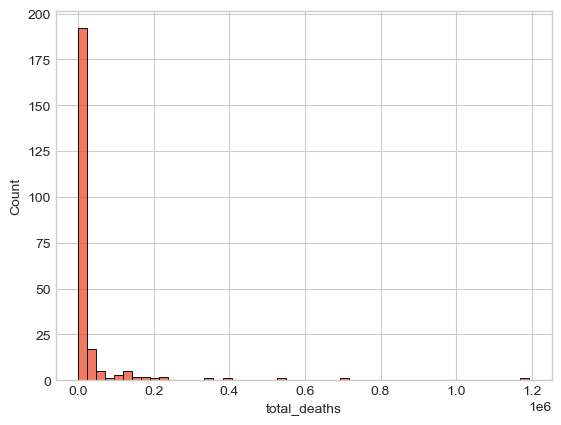

In [76]:
# draw histogram to visualize them
sns.histplot(scaled_data['total_deaths'], color='#ee4c2c', bins=50);

### Standard Scalling

In [78]:
# reduce all with the mean and scale the data to unit variance
# x = (x-xmean)/std
standard_scaler = StandardScaler()
scaled_data['total_deaths'] = standard_scaler.fit_transform(scaled_data[['total_deaths']])

print('Mean:', scaled_data['total_deaths'].mean()) # almost 0
print('Standard Deviation:', scaled_data['total_deaths'].std()) # almost 1

Mean: 1.3110080397169402e-17
Standard Deviation: 1.0021344741468106


C:\Users\KStol\AppData\Local\Temp\ipykernel_15208\3007256519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['total_deaths'] = standard_scaler.fit_transform(scaled_data[['total_deaths']])


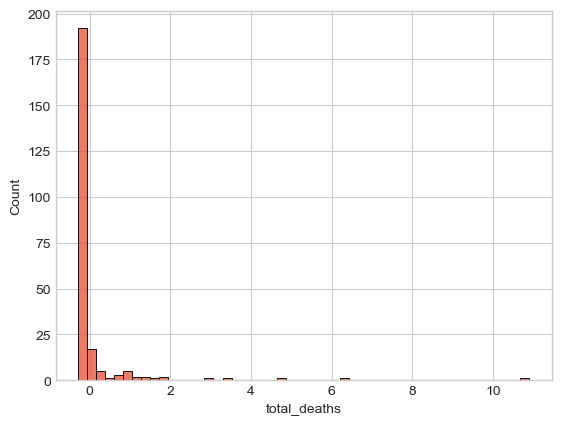

In [79]:
# histogram has same shape, but 0,0 is in the middle
sns.histplot(scaled_data['total_deaths'], color='#ee4c2c', bins=50);

### Min-Max Scalling - Normalization

In [81]:
minmax_scaler = MinMaxScaler()
scaled_data['death_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['total_deaths']])

print('Mean:', scaled_data['death_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['death_min_max_scaled'].std())

Mean: 0.025174840275965466
Standard Deviation: 0.08967398594425581


C:\Users\KStol\AppData\Local\Temp\ipykernel_15208\2406636407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['death_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['total_deaths']])


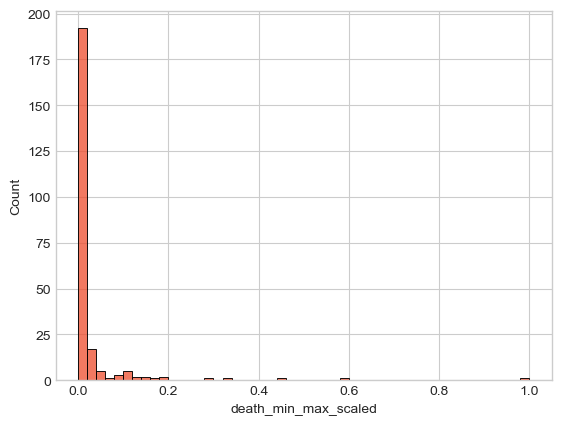

In [82]:
# values are in [0, 1]
sns.histplot(scaled_data['death_min_max_scaled'], color='#ee4c2c', bins=50);

In [83]:
qtrans = QuantileTransformer()
scaled_data['death_trans_uniform'] = qtrans.fit_transform(scaled_data[['total_deaths']])

print('Mean:', scaled_data['death_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['death_trans_uniform'].std())

Mean: 0.4994908165120931
Standard Deviation: 0.29138389561694783


C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (235). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\KStol\AppData\Local\Temp\ipykernel_15208\1644232399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['death_trans_uniform'] = qtrans.fit_transform(scaled_data[['total_deaths']])


In [84]:
qtrans = QuantileTransformer()
scaled_data['death_trans_uniform'] = qtrans.fit_transform(scaled_data[['total_deaths']])

print('Mean:', scaled_data['death_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['death_trans_uniform'].std())

Mean: 0.4994908165120931
Standard Deviation: 0.29138389561694783


C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (235). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\KStol\AppData\Local\Temp\ipykernel_15208\1644232399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['death_trans_uniform'] = qtrans.fit_transform(scaled_data[['total_deaths']])


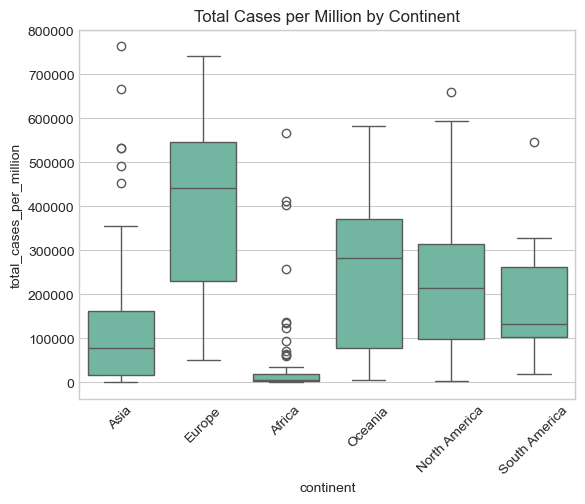

In [85]:
sns.boxplot(x='continent', y='total_cases_per_million', data=df_covid_cleaned)
plt.title("Total Cases per Million by Continent")
plt.xticks(rotation=45)
plt.show()


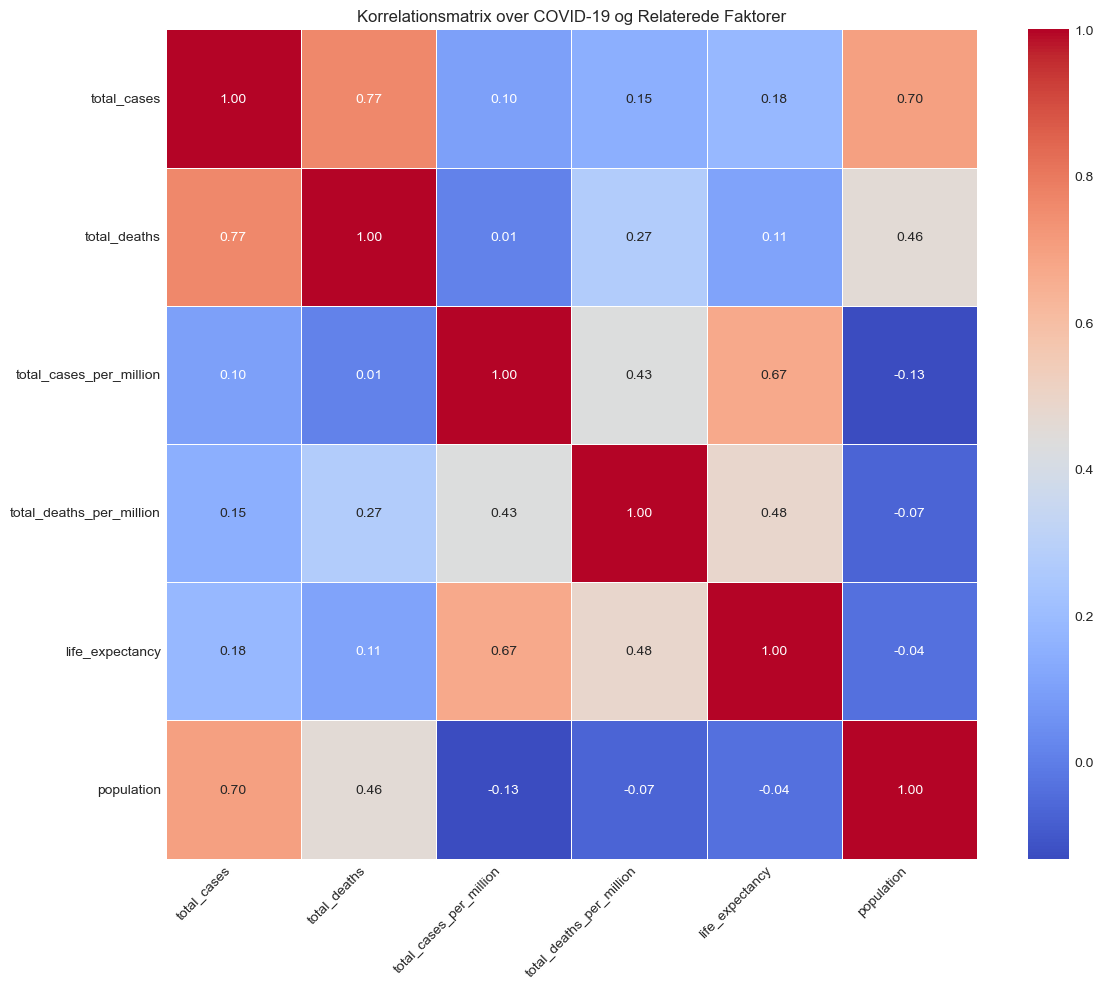

In [86]:
correlation_matrix = df_covid_cleaned.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix over COVID-19 og Relaterede Faktorer")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Checking for Normal Distribution
Before applying statistical methods, it is important to understand how the data is distributed. Many techniques — such as t-tests, ANOVA, and linear regression — assume that the data follows a normal distribution. If this assumption is not met, the results may not be reliable.

To check for normality, we define a custom function called check_normality. This function runs through each numeric column (excluding total_deaths) and performs several checks:

**Skewness** measures how symmetric the data is:

- A positive skew means the distribution has a long tail on the right.
- A negative skew means the tail is on the left.

General interpretation:

- |skew| < 0.5 → roughly symmetric
- 0.5 < |skew| < 1 → moderately skewed
- |skew| > 1 → highly skewed

**Kurtosis** measures how sharp or flat the peak is, and how heavy the tails are compared to a normal curve:

- Kurtosis > 3 → sharper peak, more outliers
- Kurtosis < 3 → flatter peak, fewer outliers
- In pandas, the `kurt()` function returns **excess kurtosis**, so a value of 0 indicates a normal distribution.

The function also applies two statistical tests for normality:

- D’Agostino’s K-squared test
- Jarque-Bera test

Both tests return a p-value. If the p-value is greater than 0.05, the data is considered likely to be normally distributed. If the p-value is below 0.05, the data likely deviates from a normal distribution.

Based on these results, each feature is classified as:

- Yes – likely normal (both p-values > 0.05 and skewness < 1)
- Partial – somewhat normal (D’Agostino p > 0.01 and skewness < 2)
- No – not normal (does not meet the above criteria)

The function returns a summary table showing each feature’s skewness, kurtosis, p-values, and classification. This step is an important part of exploratory data analysis and helps us decide whether we need to transform any variables or choose alternative statistical methods.

In [88]:
print("\n..Test normality in the covid dataframe:")

# Function to test normality of numeric columns
def check_normality(df):
    """
    Tests whether numeric columns follow a normal distribution.
    Uses D’Agostino and Jarque-Bera tests. 
    """
    num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col != 'total_deaths']
    
    rows = []

    for col in num_cols:
        data = df[col]
        skewness = data.skew()
        kurtosis = data.kurt()
        dagostino = stats.normaltest(data)
        jb = stats.jarque_bera(data)

        normal = "No"
        if dagostino.pvalue > 0.05 and jb.pvalue > 0.05 and abs(skewness) < 1:
            normal = "Yes"
        elif dagostino.pvalue > 0.01 and abs(skewness) < 2:
            normal = "Partial"

        rows.append({
            'Column': col,
            'Skewness': round(skewness, 3),
            'Kurtosis': round(kurtosis, 3),
            "D'Agostino p-value": f"{dagostino.pvalue:.2e}",
            "Jarque-Bera p-value": f"{jb.pvalue:.2e}",
            'Normally Distributed?': normal
        })

    return pd.DataFrame(rows)

# Run normality checks on all numeric columns
check_normality(df_covid_cleaned)


..Test normality in the covid dataframe:


,Column,Skewness,Kurtosis,D'Agostino p-value,Jarque-Bera p-value,Normally Distributed?
0,total_cases,6.355,47.822,1.20e-70,0.00e+00,No
1,total_cases_per_million,0.802,-0.538,2.32e-06,8.99e-07,No
2,total_deaths_per_million,1.305,1.462,2.34e-12,3.22e-19,No
3,life_expectancy,-0.713,-0.150,1.64e-04,4.71e-05,No
4,population,9.168,90.816,2.67e-88,0.00e+00,No


##### Feature Selection
Feature selection and comparison were carried out during the data cleaning and exploratory process. In our analysis, we consider deaths as the dependent variable, while the remaining features are treated as independent variables that may help explain or influence the death toll.

# 2. Supervised machine learning: linear regression

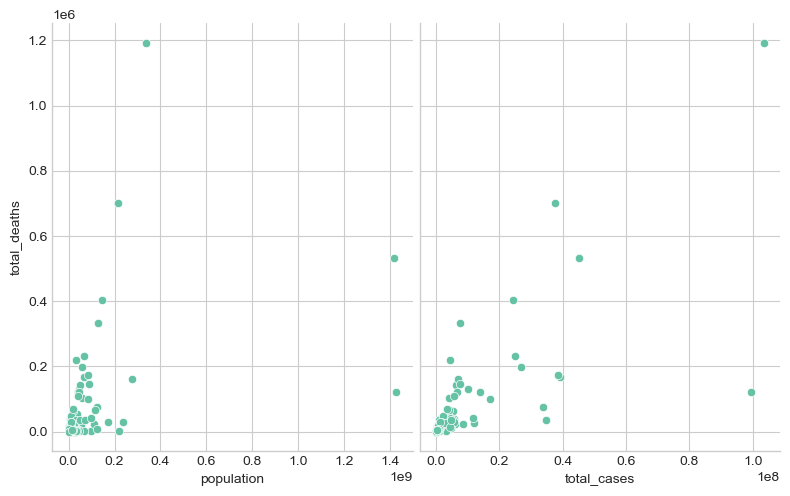

In [91]:
# visualise the features and the response using scatterplots
sns.pairplot(df_covid_cleaned, x_vars=['population', 'total_cases',], y_vars='total_deaths', height=5, aspect=0.8)

# 3. Supervised machine learning: classification

To investigate what factors may indicate a country’s risk of experiencing a high number of COVID-19 deaths, we trained a Random Forest Classifier using total cases, life expectancy, and population as input features. A binary target variable, high_mortality, was created by labeling countries with total deaths above the median as "high mortality" and those below as "low mortality".

In [94]:
# Binary target based on the median
median_deaths = df_covid_cleaned['total_deaths'].median()
df_covid_cleaned['high_mortality'] = df_covid_cleaned['total_deaths'] > median_deaths

In [95]:
# choose feature and target 
features = ['total_cases', 'life_expectancy', 'population']
target = 'high_mortality'

X = df_covid_cleaned[features]
y = df_covid_cleaned[target]

# Split i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8813559322033898

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.88      0.86        25
        True       0.91      0.88      0.90        34

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



We tested the model using a 75/25 split between training and test data. The model achieved an accuracy of 88.1%, indicating high precision and strong generalization ability. A previous test using an 80/20 split gave 87.2%, confirming the model’s stability across different data splits. Precision will be 0.85 (low mortality), 0.91 (high mortality)

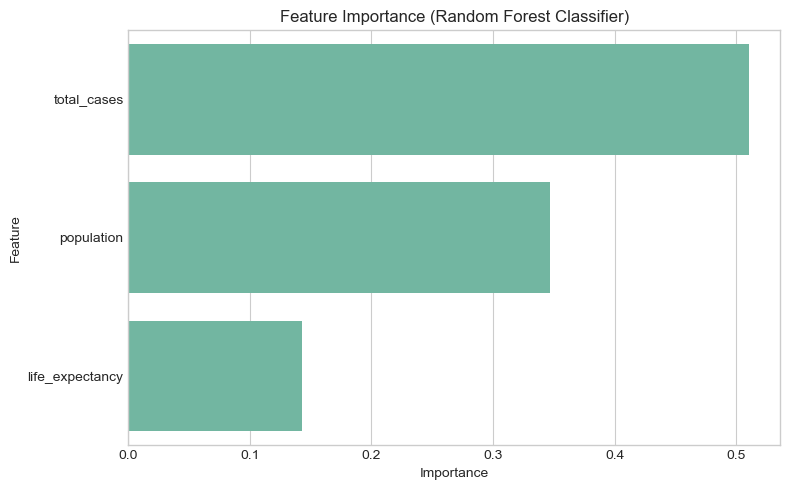

In [99]:
# Get and sort the feature importance 
importances = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=features_df, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest Classifier)')
plt.tight_layout()
plt.show()

# 4. Unsupervised machine learning: clustering

To uncover patterns in how countries were affected by COVID-19, we applied KMeans clustering using the features:
total_cases, life_expectancy, and population.

In [102]:
# choose numeric features for clustering
features_cluster = ['total_cases', 'life_expectancy', 'population']
X_cluster = df_covid_cleaned[features_cluster]

# Standardise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [103]:
# KMeans cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# add cluster labels for dataframe
df_covid_cleaned['cluster'] = clusters


C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [104]:
# Silhouette score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.53


Before clustering, we standardized the data using StandardScaler to ensure equal weighting of features.

We chose to use KMeans with 3 clusters, which grouped countries based on similarities in the selected variables. The silhouette score was 0.53, indicating a reasonably good separation between clusters

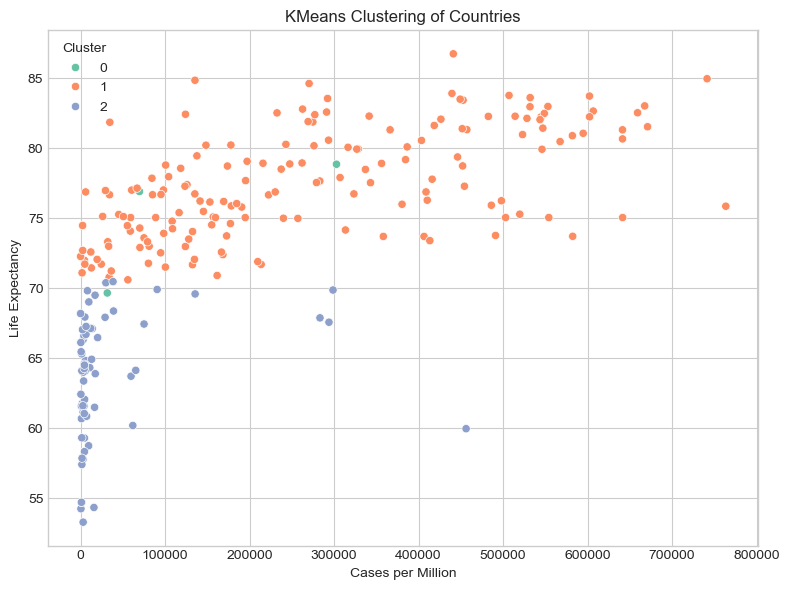

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='total_cases_per_million',
    y='life_expectancy',
    hue='cluster',
    data=df_covid_cleaned,
    palette='Set2'
)
plt.title('KMeans Clustering of Countries')
plt.xlabel('Cases per Million')
plt.ylabel('Life Expectancy')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


The clusters were visualized in a 2D scatterplot showing how countries separate based on life expectancy and COVID-19 cases. The results showed:
Cluster 1 (168 countries): moderate life expectancy and high case numbers
Cluster 2 (64 countries): generally lower life expectancy and lower case numbers
Cluster 0 (3 countries): outliers with extreme combinations

C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KStol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

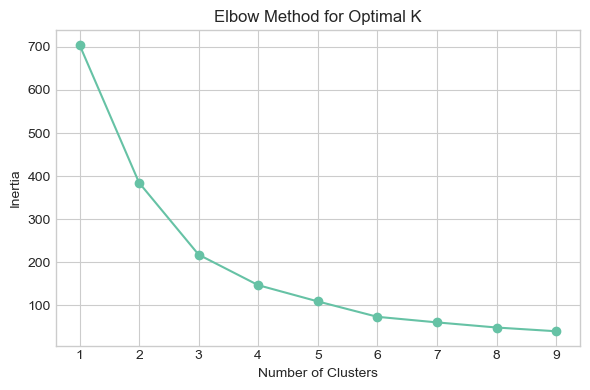

In [108]:
inertias = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.tight_layout()
plt.show()


To confirm that 3 clusters was a suitable choice, we used the elbow method. By plotting the inertia for cluster values from 1 to 9, we observed a distinct “elbow” at k = 3, which supports the decision.

In [110]:
df_covid_cleaned['cluster'].value_counts()


cluster
1    168
2     64
0      3
Name: count, dtype: int64

# 5. Implementation of the models in a Streamlit application